In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


In [2]:
# Read the data

df = pd.read_csv('movies.csv')

In [3]:
# Check missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
for col in ['rating','released','writer','star','country','company']:
    df[col] = df[col].fillna('NA')

In [5]:
for col in ['score','votes','budget','gross','runtime']:
    df[col] = df[col].fillna(0.0)

In [6]:
# Data types for col
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [8]:
df[['date','correctyear']] = df['released'].str.split(',',expand=True)

In [9]:
df['correctyear'] = df['correctyear'].astype('str').str[1:5]

In [10]:
df = df.drop(['year','date'],1)


/var/folders/hn/pv53xc2d0q5_bfnb2nhwm3rh0000gn/T/ipykernel_6896/3462771569.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(['year','date'],1)


In [11]:
df = df.rename({'correctyear':'year'}, axis = 1)

In [12]:
pd.set_option('display.max_rows',None)

In [24]:
# show unique value
df['company'].drop_duplicates().sort_values(ascending = False)
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year
0,6587,7,6,1705,8.4,927000.0,2589,4015,1047,55,19000000,46998772,2320,146.0,0
1,5573,7,1,1492,5.8,65000.0,2269,1632,327,56,4500000,58853106,731,104.0,0
2,5142,5,0,1771,8.7,1200000.0,1111,2567,1745,56,18000000,538375067,1540,124.0,0
3,286,5,4,1492,7.7,221000.0,1301,2000,2247,56,3500000,83453539,1813,88.0,0
4,1027,7,4,1543,7.3,108000.0,1054,521,410,56,6000000,39846344,1778,98.0,0


In [25]:
# High Correlation with Gross
# Budget / Company
df.sort_values(by=['gross'], inplace = False, ascending = False)
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year
0,6587,7,6,1705,8.4,927000.0,2589,4015,1047,55,19000000,46998772,2320,146.0,0
1,5573,7,1,1492,5.8,65000.0,2269,1632,327,56,4500000,58853106,731,104.0,0
2,5142,5,0,1771,8.7,1200000.0,1111,2567,1745,56,18000000,538375067,1540,124.0,0
3,286,5,4,1492,7.7,221000.0,1301,2000,2247,56,3500000,83453539,1813,88.0,0
4,1027,7,4,1543,7.3,108000.0,1054,521,410,56,6000000,39846344,1778,98.0,0


[]

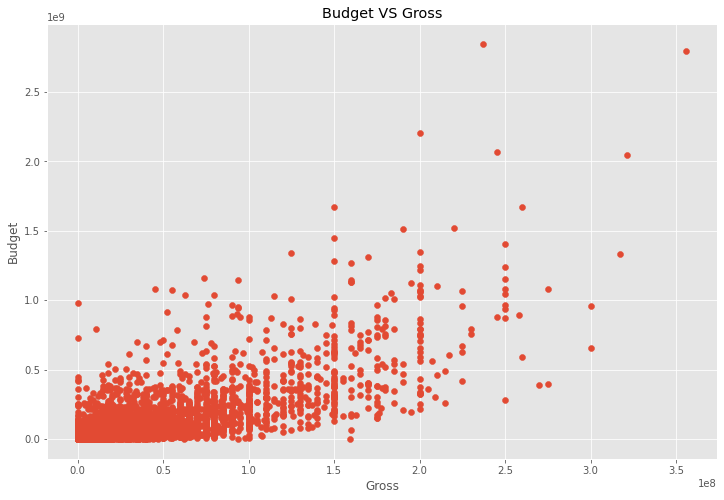

In [15]:
# Scatter plot with budget vs gross

plt.scatter( x = df['budget'], y = df['gross'])
plt.title('Budget VS Gross')
plt.xlabel('Gross')
plt.ylabel('Budget')
plt.plot()

<AxesSubplot:xlabel='budget', ylabel='gross'>

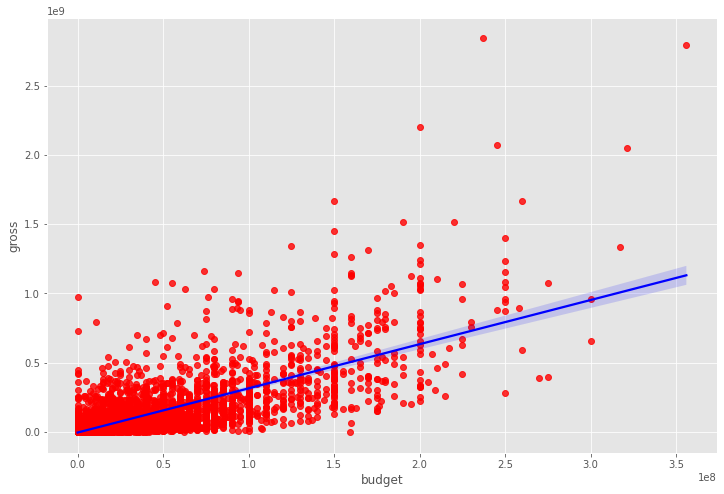

In [16]:
# Plot budget vs gross using seaborn
sns.regplot( x ='budget', y ='gross', data = df, scatter_kws={'color':'red'},line_kws={'color':'blue'})

In [17]:
# Correlation
df.corr() #pearson, kendall, spearman <= diff method

,score,votes,budget,gross,runtime
score,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.394564,0.306984,0.268372,0.244339,1.000000


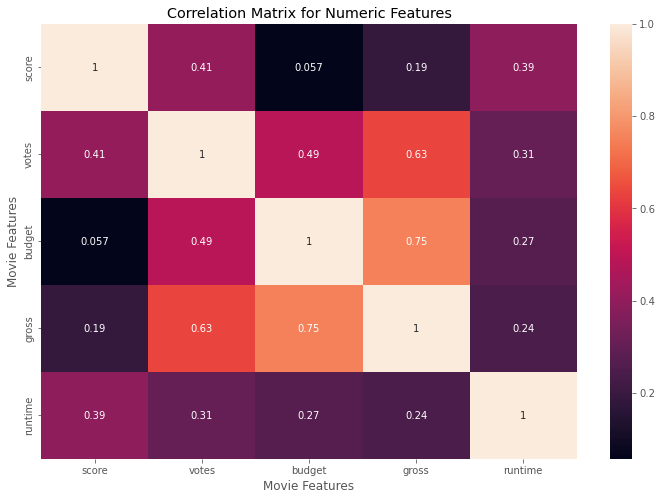

In [18]:
correlation_matrix = df.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [19]:
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

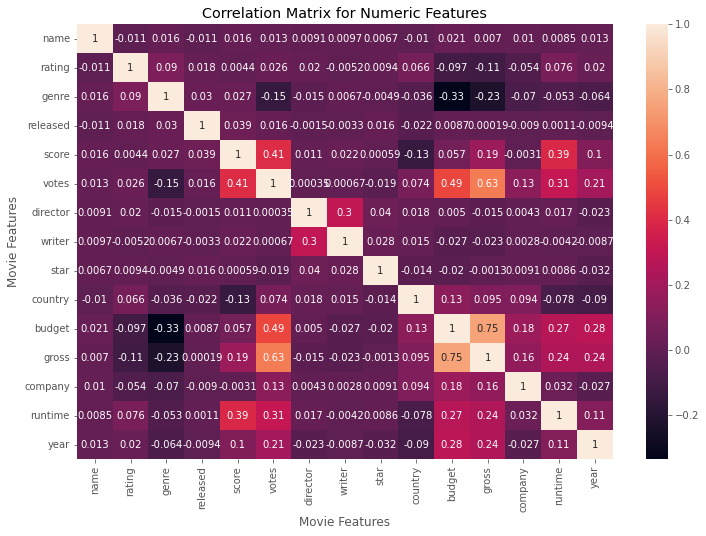

In [20]:
correlation_matrix = df_numerized.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [21]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values()


In [22]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]


In [23]:
# Votes and budget have the highest correlation with gross